In [1]:
import pandas as pd
import numpy as np

# Importing data

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\TCS.NS (2).csv")

In [3]:
data.shape

(247, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-15,3487.000000,3526.000000,3460.149902,3520.649902,3460.564941,1429449
1,2023-02-16,3527.199951,3575.000000,3527.000000,3558.050049,3497.326660,1618931
2,2023-02-17,3526.149902,3538.899902,3490.000000,3501.149902,3441.397705,1061369
3,2023-02-20,3502.000000,3522.000000,3475.050049,3487.300049,3427.784180,1296082
4,2023-02-21,3494.000000,3508.899902,3444.750000,3451.000000,3392.103516,1139541


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## PLOTTING SCATTER PLOT

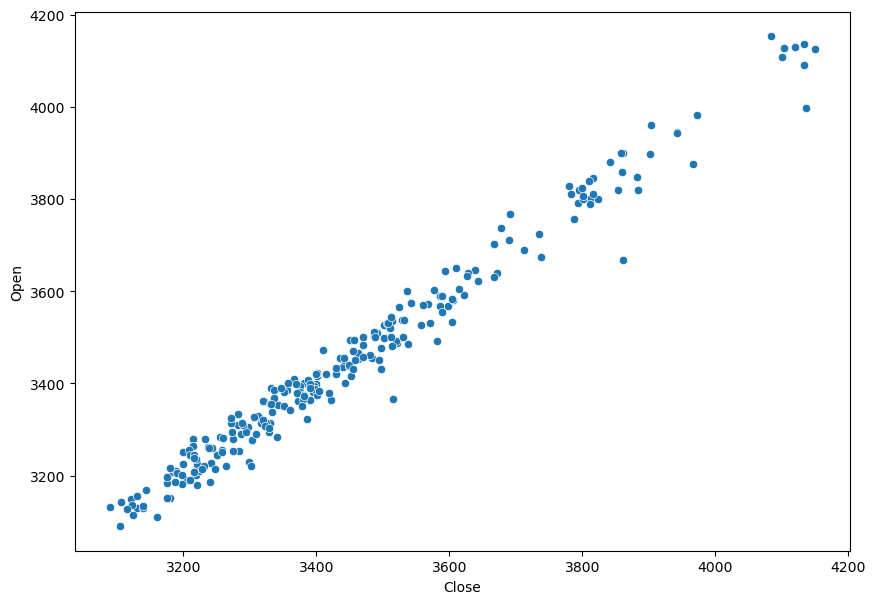

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(x="Close",y="Open",data=data)
plt.show()

## the data show there is high positive correlation between open and close

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       247 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder #label encoding date column
le = LabelEncoder()
data.Date = pd.Series(le.fit_transform(data['Date']))

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,3487.000000,3526.000000,3460.149902,3520.649902,3460.564941,1429449
1,1,3527.199951,3575.000000,3527.000000,3558.050049,3497.326660,1618931
2,2,3526.149902,3538.899902,3490.000000,3501.149902,3441.397705,1061369
3,3,3502.000000,3522.000000,3475.050049,3487.300049,3427.784180,1296082
4,4,3494.000000,3508.899902,3444.750000,3451.000000,3392.103516,1139541


In [10]:
# separating input and output

X=data.iloc[:,[0,1,2,3,5,6]]
y=data.Close

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

In [12]:
y_test.shape


(75,)

In [13]:
X_test.shape

(75, 6)

In [14]:
# Building the model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test) #prediction on test data
print(y_pred)

[3312.61457236 4106.46694645 3815.60538429 3872.29980747 3305.56460024
 3707.56793903 3254.69966431 3401.76616429 3386.04551375 3455.4318973
 3233.59082525 3246.23607569 3337.44951864 3459.99807582 3333.6014937
 3607.84753261 3401.49869984 3225.75390498 3123.78148901 3223.48433416
 3730.99641116 3260.39642232 3476.53010861 3505.29100361 3449.39237163
 3463.54100058 4126.79902508 3439.29850201 3130.55687235 3788.11954667
 3861.36836331 3169.75345479 3287.89015211 3810.11409341 3500.94088407
 3456.52019339 3126.73384647 3195.74725964 3221.12005817 4088.00921198
 3453.70251318 3202.45188561 3512.03155256 3949.31046864 3223.59810976
 3279.45361365 3211.2289157  3325.29636982 3136.66326546 3517.97922521
 3340.99240519 3623.89774974 3334.79429203 3579.10685356 3581.32389709
 3488.65690668 3324.24310697 3119.71063994 3328.63420958 3862.65954073
 3805.48875451 3526.30891428 3344.44835474 4136.33442936 3214.85503956
 3525.39936319 3087.638459   3362.0998909  3672.76010947 3278.86677009
 3203.31

In [16]:
y_test

67     3320.350098
246    4103.200195
209    3824.000000
223    3882.800049
90     3302.250000
          ...     
88     3197.350098
171    3350.949951
241    4134.100098
114    3399.949951
177    3380.250000
Name: Close, Length: 75, dtype: float64

In [17]:
type(y_test)

pandas.core.series.Series

In [18]:
df_new=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})


In [19]:
df_new['Error']=df_new['y_test']-df_new['y_pred']


In [20]:
df_new

,y_test,y_pred,Error
67,3320.350098,3312.614572,7.735526
246,4103.200195,4106.466946,-3.266751
209,3824.000000,3815.605384,8.394616
223,3882.800049,3872.299807,10.500242
90,3302.250000,3305.564600,-3.314600
...,...,...,...
88,3197.350098,3203.310712,-5.960614
171,3350.949951,3354.114941,-3.164990
241,4134.100098,4139.615330,-5.515232
114,3399.949951,3405.041072,-5.091121


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 29.062330383414846
R-squared Score: 0.9996004112071666


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 4.82302523738781


In [23]:
data.to_csv(r'C:\Users\dell\Desktop\New folder\output_file.csv', index=False)

In [24]:
######################################## THE END################################################################################